In [58]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_blobs, make_moons
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [102]:
# data, target = make_blobs(n_samples=500, centers=2, cluster_std=1.8)
data, target = make_moons(n_samples=500, noise=0.1)

In [103]:
data.shape

(500, 2)

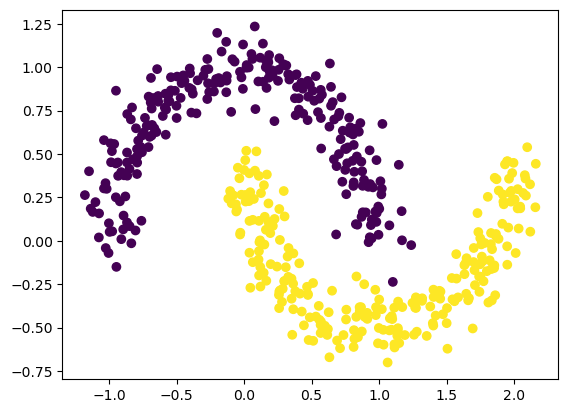

In [104]:
plt.scatter(data[:,0], data[:,1], c=target)
plt.show()

In [105]:
def plotBoundary(pred):
    x1 = np.arange(min(data[:,0]) - 1, max(data[:,0]) + 1, step=0.01)
    x2 = np.arange(min(data[:,1]) - 1, max(data[:,1]) + 1, step=0.01)
    xx, yy = np.meshgrid(x1, x2)
    x = np.array([xx.flatten(), yy.flatten()]).T
    z = pred(x)
    z = z.reshape(xx.shape)
    plt.contourf(xx, yy, z)
    plt.scatter(data[:,0], data[:,1], c=target, cmap=ListedColormap(("white","red")))
    plt.show()

In [106]:
logistic = LogisticRegression()
logistic.fit(data, target)

LogisticRegression()

In [107]:
y_pred = logistic.predict(data)
accuracy_score(target, y_pred)

0.88

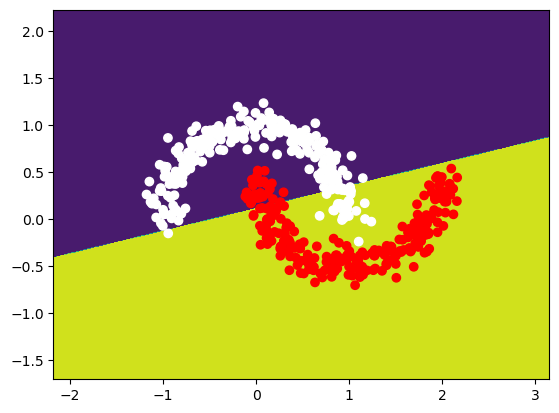

In [108]:
plotBoundary(lambda x : logistic.predict(x))

In [112]:
# svc = SVC(kernel='linear')
svc = SVC(kernel='rbf', C=1.6)
# svc = SVC(kernel='poly')
svc.fit(data, target)

SVC(C=1.6)

In [113]:
svc_pred = svc.predict(data)
accuracy_score(target, svc_pred)

0.998

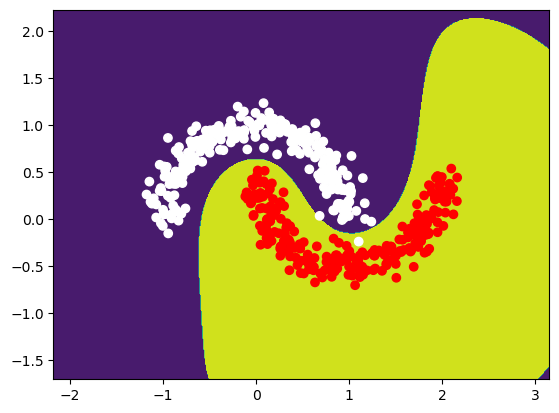

In [114]:
plotBoundary(lambda x : svc.predict(x))